### 1. 라이브러리 불러오기

일반 CPU 활용 시

In [1]:
# import tensorflow as tf

# gpus = tf.config.experimental.list_physical_devices('GPU')

# gpus

In [2]:
# if gpus:
#     # 텐서플로가 첫 번째 GPU만 사용하도록 제한
#     try:
#         tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
#     except RuntimeError as e:
#     # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
#         print(e)

In [3]:
# from tensorflow.keras import backend as K

# K.clear_session()

# from numba import cuda
# cuda.select_device()
# cuda.close()

In [4]:
# 라이브러리 정의 
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

cuda nvidia gpu 활용 시

In [5]:
# How to check if the code is running on GPU or CPU?

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17636340868462707140
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 16308863054327063236
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1434376601
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11628062299786352704
physical_device_desc: "device: 0, name: GeForce GTX 950M, pci bus id: 0000:01:00.0, compute capability: 5.0"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 12750603627372452262
physical_device_desc: "device: XLA_GPU device"
]


intel gpu 활용 시

In [6]:
# import numpy as np
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋 
# from keras.datasets import mnist


In [7]:
import warnings
warnings.filterwarnings(action="ignore")

In [8]:
# 일반 CPU 활용
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline

### 2. 데이터 불러오기 및 분리

In [9]:
imageList = []
labelList = []
IMG_SIZE = 48

In [10]:
basedir = "../images/gender"

In [11]:
categories = os.listdir(basedir)
categories

['0', '1']

In [12]:
# 폴더 순환
for i in range(0, len(categories)):
    labelPath = os.path.join(basedir, categories[i])
    imagePath = os.listdir(labelPath)
    print(i)
    
    # 이미지 순환
    for j in range(0, len(imagePath)):
        imageFullPath = os.path.join(labelPath, imagePath[j])
        # 이미지 로드 오류 시, 에러로깅
        try:
            baseImg = cv2.imread(imageFullPath, cv2.IMREAD_GRAYSCALE)

            ### 1. 이미지 사이즈 변경
            refinedImg = cv2.resize(baseImg, (IMG_SIZE,IMG_SIZE))

            #plt.imshow(refinedImg, cmap="gray")
            imageList.append(refinedImg)
            labelList.append(i)
        except Exception as e:
            print(e, imageFullPath)
            pass

0
1


In [13]:
# 리스트는 어펜드시키기 편하고 빠르다.
# 어레이도 느리진 않은데 미리 크기를 선언해주어야 하므로
# 리스트로 만들어 어펜드 시킨후 어레이로 변환 시켜 준다.
imageArray = np.array(imageList)
labelArray = np.array(labelList)

In [14]:
print(imageArray.shape)
print(labelArray.shape)

(23708, 48, 48)
(23708,)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
trainingData_features,\
testData_features,\
trainingData_labels,\
testData_labels = \
train_test_split(imageArray, labelArray, test_size=0.2, random_state=2)

In [17]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(18966, 48, 48)
(4742, 48, 48)
(18966,)
(4742,)


In [18]:
trainingData_features = trainingData_features.reshape(len(trainingData_features), 
                              IMG_SIZE, 
                              IMG_SIZE, 
                              1)
testData_features = testData_features.reshape(len(testData_features), 
                          IMG_SIZE, 
                          IMG_SIZE, 
                          1)

In [19]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_labels.shape)
print(testData_labels.shape)

(18966, 48, 48, 1)
(4742, 48, 48, 1)
(18966,)
(4742,)


In [20]:
trainingData_features_norm = trainingData_features/255.0
testData_features_norm = testData_features/255.0

In [21]:
### 정답지는 softmax랑 결합을 위한 onehot encoding

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
trainingData_labels_one = to_categorical(trainingData_labels)
testData_labels_one = to_categorical(testData_labels)

In [24]:
trainingData_labels_one[0]

array([1., 0.], dtype=float32)

### 3. 모델 생성

In [25]:
inputShape = trainingData_features[0].shape
inputShape

(48, 48, 1)

In [26]:
outputShape = len(categories)
outputShape

2

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [28]:
# 모델 생성 시작
model = Sequential()

In [29]:
model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 padding="same",
                 activation="relu",
                input_shape=inputShape))

In [30]:
model.add(MaxPool2D(pool_size=2))

In [31]:
model.add(Dropout(rate=0.4))

In [32]:
model.add(Conv2D(filters=32, 
                 kernel_size=3, 
                 padding="same",
                 activation="relu",
                input_shape=inputShape))

In [33]:
model.add(MaxPool2D(pool_size=2))

In [34]:
model.add(Flatten())

In [35]:
model.add(Dense(units=outputShape, activation="softmax"))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 9

In [37]:
from tensorflow.keras.utils import plot_model

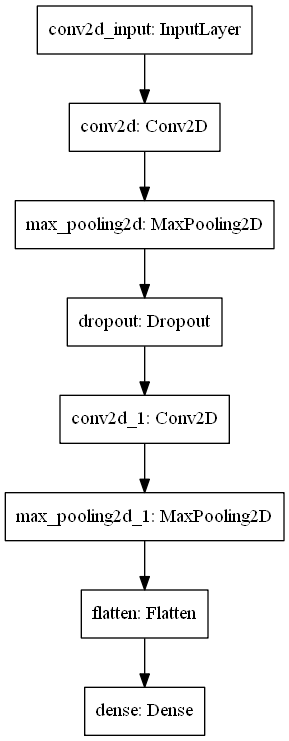

In [38]:
plot_model(model)

### 4. 모델 컴파일

In [39]:
# 이름이 기억 안나면 keras.losses. 쭉 나온다.
# 마찬가지로 옵티마이저도 keras.optimizer. 치면 나온다.
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

### 5. 모델학습(훈련)

In [40]:
epochNo = 5

In [41]:
model.fit(x=trainingData_features_norm, 
          y=trainingData_labels_one,
          epochs=epochNo,
          batch_size=32,
          validation_data=(trainingData_features_norm,trainingData_labels_one))

Epoch 1/5
593/593 [==============================] - 9s 16ms/step - loss: 0.4984 - accuracy: 0.7527 - val_loss: 0.4374 - val_accuracy: 0.7875ETA: 0s -
Epoch 2/5
593/593 [==============================] - 12s 20ms/step - loss: 0.3734 - accuracy: 0.8366 - val_loss: 0.3415 - val_accuracy: 0.8546
Epoch 3/5
593/593 [==============================] - 9s 15ms/step - loss: 0.3379 - accuracy: 0.8550 - val_loss: 0.3111 - val_accuracy: 0.8697
Epoch 4/5
593/593 [==============================] - 9s 15ms/step - loss: 0.3176 - accuracy: 0.8614 - val_loss: 0.2903 - val_accuracy: 0.8798
Epoch 5/5
593/593 [==============================] - 9s 15ms/step - loss: 0.2992 - accuracy: 0.8726 - val_loss: 0.2754 - val_accuracy: 0.8854


### 6. 모델 추론

In [42]:
model.evaluate(x=testData_features_norm,
               y=testData_labels_one)

149/149 [==============================] - 1s 6ms/step - loss: 0.2994 - accuracy: 0.8766


[0.29938188195228577, 0.8766343593597412]

### 7. 모델 예측

In [43]:
def refineimage(testImg):
    IMG_SIZE = 48
    # 컬러이미지 -> 회색톤으로 변경
    img_gray = cv2.cvtColor(testImg, cv2.COLOR_RGB2GRAY)

    # 사이즈 조정
    img_resize = cv2.resize(img_gray, (IMG_SIZE, IMG_SIZE))

    ### Shape 변경
    img_shape = img_resize.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    img_norm = img_shape/255.0
    
    return img_norm

In [44]:
testData = cv2.imread("./sample_gender.jpg", cv2.IMREAD_COLOR)
refinedImageOne = refineimage(testData)
#refinedImageOne
#plt.imshow(refinedImageOne, cmap = "gray")
np.argmax(model.predict(refinedImageOne))

1

### 검증 테스트

In [45]:
# 폴더 순환

labelPath = os.path.join(basedir, categories[1])
imagePath = os.listdir(labelPath)
imagePath

# 이미지 순환
for j in range(0, 10):
    imageFullPath = os.path.join(labelPath, imagePath[j])
    
    # 이미지 로드 오류 시, 에러로깅
    try:
        testData = cv2.imread(imageFullPath, cv2.IMREAD_COLOR)
        testData.shape
        refinedImageOne = refineimage(testData)
        print(np.argmax(model.predict(refinedImageOne)))

    except Exception as e:
        print(e, imageFullPath)
        pass

0
1
0
1
1
1
1
0
1
1


### 8. 모델 저장

In [46]:
### 모델 구조 저장
model_json = model.to_json()

In [47]:
with open("d:/model_gender.json","w") as jsonfile:
        jsonfile.write(model_json)

In [48]:
model.save_weights("d:/model_gender_weight.h5")

In [50]:
from tensorflow.keras import backend as K

K.clear_session()

from numba import cuda
cuda.select_device(0)
cuda.close()